# TP FINAL - FSOC DATA
## Costos médicos personales

#### El siguiente dataset contiene información sobre el costo de seguro de salud por individuo en Estados Unidos. Recoge asimismo información sobre edad, sexo, índice de masa corporal (IMC), si la persona es fumadora o no y la región donde vive.

Recuperado de:

https://www.kaggle.com/datasets/mirichoi0218/insurance


In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import regression
from sklearn.linear_model import LinearRegression

In [176]:
costo_seguro= pd.read_csv("datasets/insurance.csv")
costo_seguro

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Renombramos las columnas para que sea más entendible

In [177]:
renombrador = {'age': 'Edad',
               'sex': 'Sexo',
               'bmi': 'IMC',
               'children': 'Hijos',
               'smoker': 'Fumador', 
               'region': 'Región',
               'charges':'Costo'}
costo_seguro.rename(columns= renombrador, inplace=True)
costo_seguro

,Edad,Sexo,IMC,Hijos,Fumador,Región,Costo
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA (Análisis exploratorio de los datos)

### Dimensión del DataFrame, tipos de datos y cantidad de datos nulos

In [178]:
costo_seguro.shape
X = costo_seguro.drop(columns=['Costo'])
y = costo_seguro['Costo'].name
a= f"El dataset tiene {costo_seguro.shape[1]} variables (features) y {costo_seguro.shape[0]} casos"
print(f"{'-'*len(a)}")
print(a)
print(f"{'-'*len(a)}")
print(f"VARIABLES INDEPENDIENTES")
for elemento in X:
    print(elemento)
print(f"{'-'*len(a)}")
print(f"VARIABLE DEPENDIENTE (target value)\n{y}")
print(f"{'-'*len(a)}")

----------------------------------------------------
El dataset tiene 7 variables (features) y 1338 casos
----------------------------------------------------
VARIABLES INDEPENDIENTES
Edad
Sexo
IMC
Hijos
Fumador
Región
----------------------------------------------------
VARIABLE DEPENDIENTE (target value)
Costo
----------------------------------------------------


In [179]:
costo_seguro.dtypes
print(f"""{'-'*28}
|{'VARIABLE'.center(11).ljust(11)}|{'TIPO DE DATO'.center(14).ljust(14)}|
{'-'*28}""")
for column, dtype in costo_seguro.dtypes.items():
    print(f"| {str(column).center(10).ljust(10)}|{str(dtype).center(14).ljust(10)}|\n{'-'*28}")


----------------------------
|  VARIABLE | TIPO DE DATO |
----------------------------
|    Edad   |    int64     |
----------------------------
|    Sexo   |    object    |
----------------------------
|    IMC    |   float64    |
----------------------------
|   Hijos   |    int64     |
----------------------------
|  Fumador  |    object    |
----------------------------
|   Región  |    object    |
----------------------------
|   Costo   |   float64    |
----------------------------


In [180]:
costo_seguro.isna().sum()
print(f"""{'-'*28}
|{'VARIABLE'.center(11).ljust(11)}|{' DATOS NULOS'.center(14).ljust(14)}|
{'-'*28}""")
for column, nulo in costo_seguro.isna().sum().items():
     print(f"| {str(column).center(10).ljust(10)}|{str(nulo).center(14).ljust(10)}|\n{'-'*28}")

----------------------------
|  VARIABLE |  DATOS NULOS |
----------------------------
|    Edad   |      0       |
----------------------------
|    Sexo   |      0       |
----------------------------
|    IMC    |      0       |
----------------------------
|   Hijos   |      0       |
----------------------------
|  Fumador  |      0       |
----------------------------
|   Región  |      0       |
----------------------------
|   Costo   |      0       |
----------------------------


#### Categorías de las variables categóricas

In [181]:
cat1 = set(costo_seguro['Sexo'])
cat2 = set(costo_seguro['Fumador'])
cat3 = set(costo_seguro['Región'])

print(f"{'-'*12}")
print("SEXO")
for elemento in cat1:
    print(elemento)

print(f"{'-'*12}")
print("FUMADOR")
for elemento in cat2:
    print(elemento)

print(f"{'-'*12}")
print("REGION")
for elemento in cat3:
    print(elemento)

    
print(f"{'-'*12}")



------------
SEXO
female
male
------------
FUMADOR
no
yes
------------
REGION
northeast
southeast
southwest
northwest
------------


### Estadísticos descriptivos y outliers

#### Estadísticos descriptivos (variables numéricas)

In [182]:
round(costo_seguro.describe())

,Edad,IMC,Hijos,Costo
count,1338.0,1338.0,1338.0,1338.0
mean,39.0,31.0,1.0,13270.0
std,14.0,6.0,1.0,12110.0
min,18.0,16.0,0.0,1122.0
25%,27.0,26.0,0.0,4740.0
50%,39.0,30.0,1.0,9382.0
75%,51.0,35.0,2.0,16640.0
max,64.0,53.0,5.0,63770.0


#### Outliers

Valores atípicos

Rango intercuartil = Q3 - Q1


Umbral superior = DATO > Q3 + 1.5IQR

Umbral inferior =  Dato < Q1 - 1.5IQR

In [183]:
# Calcular el rango intercuartil (IQR) de las variables numéricas
iqr = round(costo_seguro.select_dtypes(include='number').quantile(0.75) - costo_seguro.select_dtypes(include='number').quantile(0.25),2)
leg= "Rango intercuartil de variables numéricas"
# Mostrar los resultados
print(leg,"\n")
for column, inter in iqr.items():
     print(f"| {str(column).center(10).ljust(10)}|{str(inter).center(14).ljust(10)}|\n{'-'*28}")

Rango intercuartil de variables numéricas 

|    Edad   |     24.0     |
----------------------------
|    IMC    |     8.4      |
----------------------------
|   Hijos   |     2.0      |
----------------------------
|   Costo   |   11899.63   |
----------------------------


En el cálculo de los outliers se omite "Hijos" dado que es una variable discreta, de pocos valores. Carece de sentido calcular valores extremos

In [184]:
Q1_Edad = costo_seguro['Edad'].quantile(0.25)
Q3_Edad = costo_seguro['Edad'].quantile(0.75)
rango_intercuartil1 = Q3_Edad - Q1_Edad

umbral_superior_E = Q3_Edad + 1.5 * rango_intercuartil1
umbral_inferior_E = Q1_Edad - 1.5 * rango_intercuartil1

print("Un valor de Edad por debajo de",round(umbral_inferior_E,2), "es un outlier")
print("Un valor de Edad por arriba de",round(umbral_superior_E,2), "es un outlier")

Un valor de Edad por debajo de -9.0 es un outlier
Un valor de Edad por arriba de 87.0 es un outlier


> Vemos que en el caso de la variable 'Edad', el valor a partir se considera outlier un dato no tiene sentido (nadie puede tener -9 años)

In [185]:
Q1_imc = costo_seguro['IMC'].quantile(0.25)
Q3_imc = costo_seguro['IMC'].quantile(0.75)
rango_intercuartil2 = Q3_imc - Q1_imc

umbral_superior_I = Q3_imc + 1.5 * rango_intercuartil2
umbral_inferior_I = Q1_imc - 1.5 * rango_intercuartil2

print("Un valor de IMC por debajo de",round(umbral_inferior_I,2), "es un outlier")
print("Un valor de IMC por arriba de",round(umbral_superior_I,2), "es un outlier")


Un valor de IMC por debajo de 13.7 es un outlier
Un valor de IMC por arriba de 47.29 es un outlier


In [186]:
Q1_Costo = costo_seguro['Costo'].quantile(0.25)
Q3_Costo = costo_seguro['Costo'].quantile(0.75)
rango_intercuartil3 = Q3_Costo - Q1_Costo

umbral_superior_C = Q3_Costo + 1.5 * rango_intercuartil3
umbral_inferior_C = Q1_Costo - 1.5 * rango_intercuartil3

print("Un valor de Costo por debajo de",round(umbral_inferior_C,2), "es un outlier")
print("Un valor de Costo por arriba de",round(umbral_superior_C,2), "es un outlier")

Un valor de Costo por debajo de -13109.15 es un outlier
Un valor de Costo por arriba de 34489.35 es un outlier


> En 'Costo' también carece de sentido el umbral inferior desde el cual se considera un outlier

Cantidad de outliers por variable

In [187]:
outliers1 = costo_seguro[(costo_seguro['Edad'] > umbral_superior_E) | (costo_seguro['Edad'] < umbral_inferior_E)]
outliers2 = costo_seguro[(costo_seguro['IMC'] > umbral_superior_I) | (costo_seguro['IMC'] < umbral_inferior_I)]
outliers3 = costo_seguro[(costo_seguro['Costo'] > umbral_superior_C) | (costo_seguro['Costo'] < umbral_inferior_C)]

print("Cantidad de outliers en Edad:",len(outliers1))
print("Cantidad de outliers en IMC:",len(outliers2))
print("Cantidad de outliers en Costo:",len(outliers3))

Cantidad de outliers en Edad: 0
Cantidad de outliers en IMC: 9
Cantidad de outliers en Costo: 139


### Análisis gráfico por variable e interacción de variables

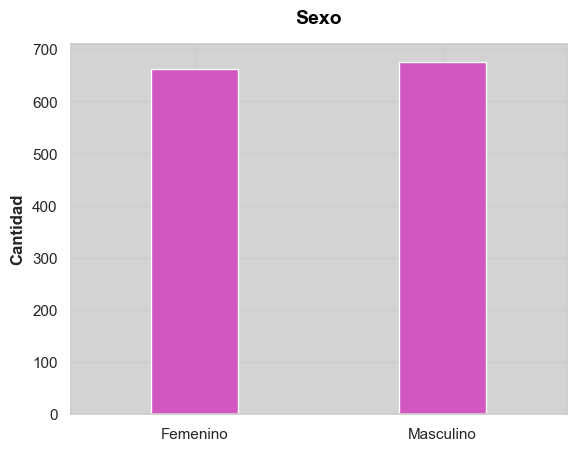

In [188]:
sns.countplot(data=costo_seguro, x='Sexo', width= 0.35, color='#E842CF')
plt.xlabel(None)
plt.xticks(['female', 'male'], ["Femenino", "Masculino"]) # las leyendas por categoría
plt.ylabel("Cantidad", fontweight= 'bold', labelpad= 5)
plt.title("Sexo", {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.gca().set_facecolor('lightgray')
plt.grid(True)
plt.show()

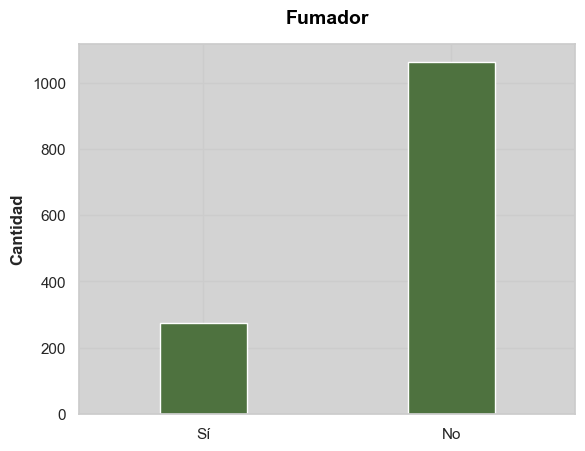

In [189]:
sns.countplot(data=costo_seguro, x='Fumador', width= 0.35, color='#4B7B36')
plt.xlabel(None)
plt.xticks(['yes', 'no'], ["Sí", "No"]) # las leyendas por categoría
plt.ylabel("Cantidad", fontweight= 'bold', labelpad= 5)
plt.title("Fumador", {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.gca().set_facecolor('lightgray')
plt.grid(True)
plt.show()

> Vemos que en la variable fumador hay clases desbalanceadas

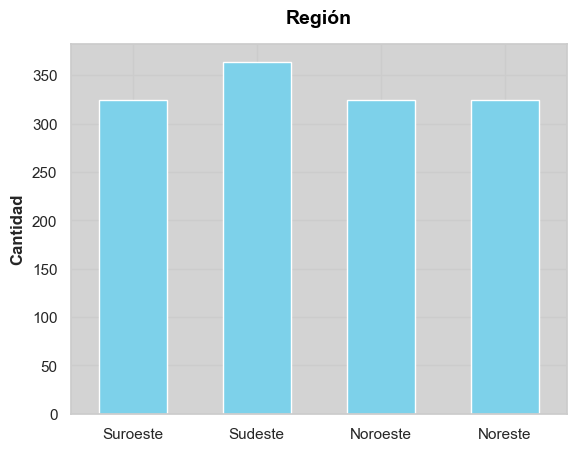

In [190]:
sns.countplot(data=costo_seguro, x='Región', width= 0.55, color= '#6BDBFC')
plt.xlabel(None)
plt.xticks(['southwest', 'northwest', 'southeast', 'northeast'], ["Suroeste", "Noroeste", "Sudeste", "Noreste"]) # las leyendas por categoría
plt.ylabel("Cantidad", fontweight= 'bold', labelpad= 5)
plt.title("Región", {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.gca().set_facecolor('lightgray')
plt.grid(True)
plt.show()

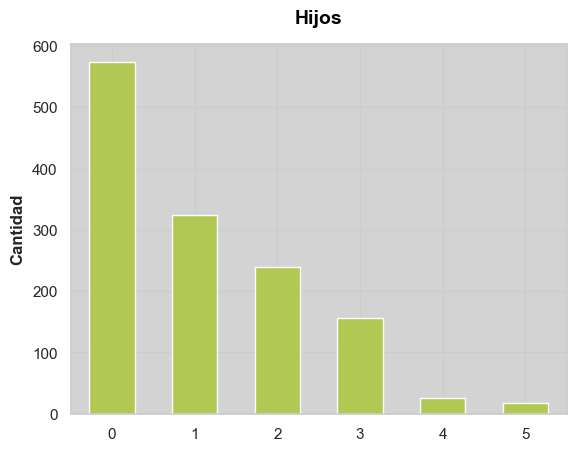

In [191]:
sns.countplot(data=costo_seguro, x='Hijos', width= 0.55, color= '#BDDC3F')
plt.gca().set_facecolor('lightgray')
plt.grid(True)
plt.xlabel(None)
plt.ylabel("Cantidad", fontweight= 'bold', labelpad= 5)
plt.title("Hijos", {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.show()

> También en la variable 'Hijos' hay clases desbalanceadas

#### Asimetria

Indica si los datos están sesgados hacia la derecha o hacia la izquierda respecto a la media.

- Asimetria == 0 la distribución es perfectamente simétrica.

- Si es > 0 la distribución es asimétria hacia la derecha.

- Si es < 0 la distribución es asimétrica hacia izquierda.


#### Curtosis 

Mide la distribución de los datos y la concentración en las colas en comparación con una distribución normal

- K = 3 curtosis normal (distribución normal).

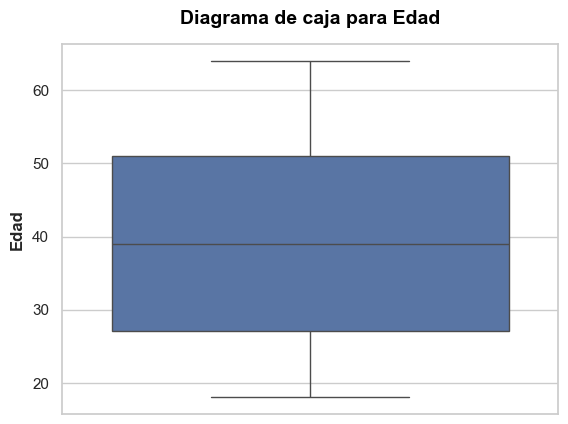

In [192]:
sns.boxplot(data=costo_seguro, y = 'Edad')
plt.title("Diagrama de caja para Edad",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.ylabel("Edad", fontweight= 'bold', labelpad= 5)
plt.show()

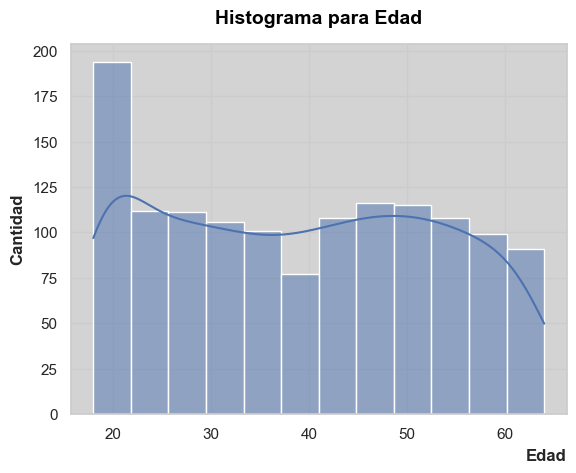

Asimetría en distribución de edades: 0.06
Curtosis en distribución de edades: -1.25


In [193]:
sns.histplot(data=costo_seguro, x='Edad', kde=True)
plt.gca().set_facecolor('lightgray')
plt.grid(True)
plt.title("Histograma para Edad",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("Edad", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.ylabel("Cantidad", fontweight= 'bold', labelpad= 5)

plt.show()

print("Asimetría en distribución de edades:",round(costo_seguro['Edad'].skew(),2))
print("Curtosis en distribución de edades:", round(costo_seguro['Edad'].kurt(),2))

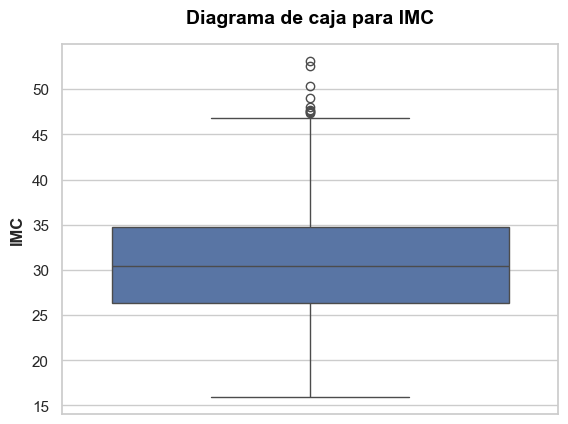

In [194]:
sns.boxplot(data=costo_seguro, y = 'IMC')
plt.title("Diagrama de caja para IMC",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.ylabel("IMC", fontweight= 'bold', labelpad= 5)
plt.show()

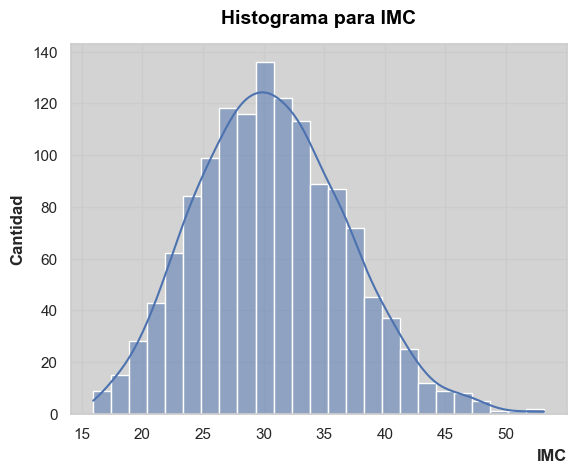

Asimetría en distribución del IMC: 0.28
Curtosis en distribución del IMC: -0.05


In [195]:
sns.histplot(data=costo_seguro, x='IMC', kde=True)
plt.gca().set_facecolor('lightgray')
plt.grid(True)
plt.title("Histograma para IMC",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("IMC", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.ylabel("Cantidad", fontweight= 'bold', labelpad= 5)

plt.show()

print("Asimetría en distribución del IMC:",round(costo_seguro['IMC'].skew(),2))
print("Curtosis en distribución del IMC:", round(costo_seguro['IMC'].kurt(),2))

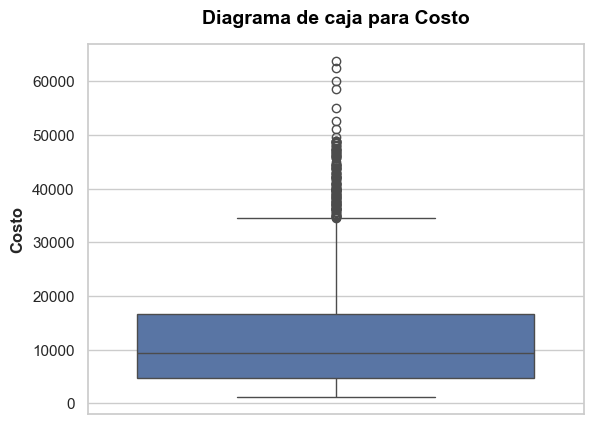

In [196]:
sns.boxplot(data=costo_seguro, y = 'Costo')
plt.title("Diagrama de caja para Costo",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.ylabel("Costo", fontweight= 'bold', labelpad= 5)
plt.show()

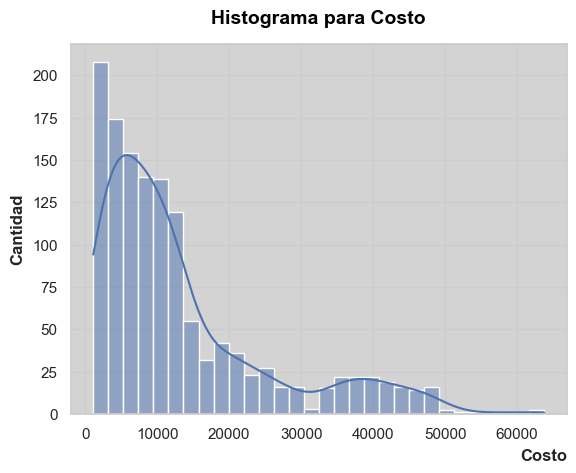

Asimetría en distribución del IMC: 1.52
Curtosis en distribución del IMC: 1.61


In [197]:
sns.histplot(data=costo_seguro, x='Costo', kde=True)
plt.gca().set_facecolor('lightgray')
plt.grid(True)
plt.title("Histograma para Costo",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("Costo", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.ylabel("Cantidad", fontweight= 'bold', labelpad= 5)

plt.show()

print("Asimetría en distribución del IMC:",round(costo_seguro['Costo'].skew(),2))
print("Curtosis en distribución del IMC:", round(costo_seguro['Costo'].kurt(),2))

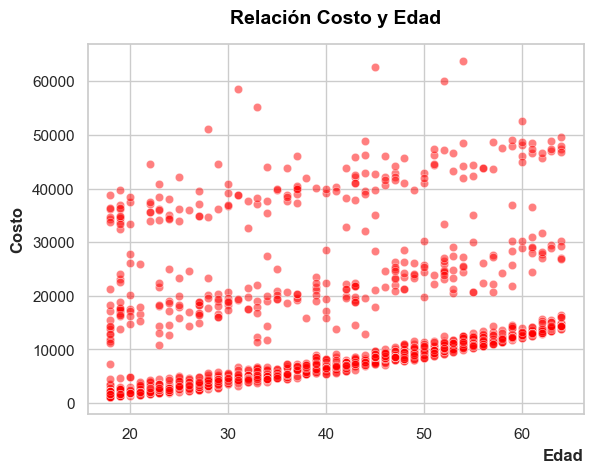

In [198]:
sns.scatterplot(data=costo_seguro,x='Edad',y='Costo', color='red', alpha= 0.5)
plt.title("Relación Costo y Edad",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("Edad", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.ylabel("Costo", fontweight= 'bold', labelpad= 5)
plt.show()

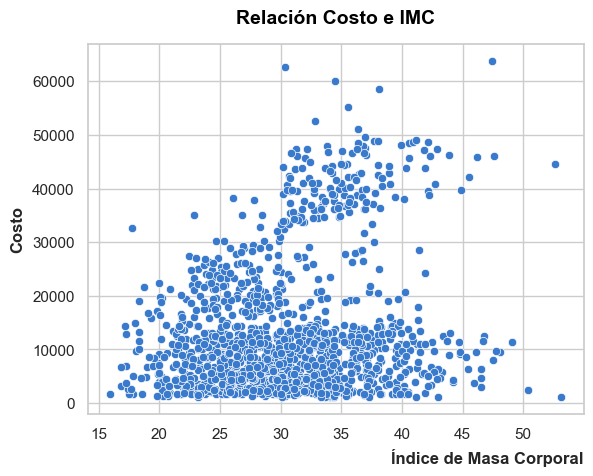

In [199]:
sns.scatterplot(data=costo_seguro,x='IMC',y='Costo', color='#3A7ACC') 
plt.title("Relación Costo e IMC",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("Índice de Masa Corporal", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.ylabel("Costo", fontweight= 'bold', labelpad= 5)
plt.show()

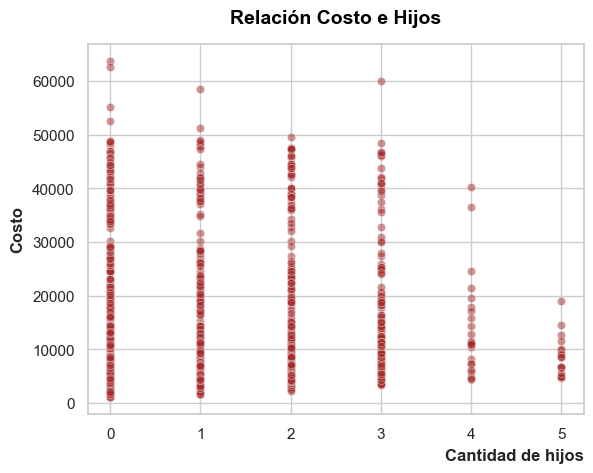

In [200]:
sns.scatterplot(data=costo_seguro,x='Hijos',y='Costo', color='brown', alpha= 0.5)
plt.title("Relación Costo e Hijos",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("Cantidad de hijos", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.ylabel("Costo", fontweight= 'bold', labelpad= 5)
plt.show()

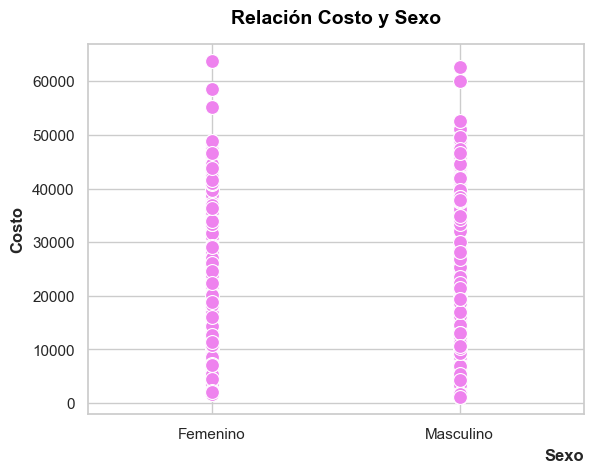

In [201]:
sns.scatterplot(data=costo_seguro, x='Sexo', y='Costo', color='violet', s=100)
plt.xlim(-0.5, 1.5)  # Ajusta los límites del eje x
plt.title("Relación Costo y Sexo",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("Sexo", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.xticks(['female', 'male'], ["Femenino", "Masculino"])
plt.ylabel("Costo", fontweight= 'bold', labelpad= 5)
plt.show()

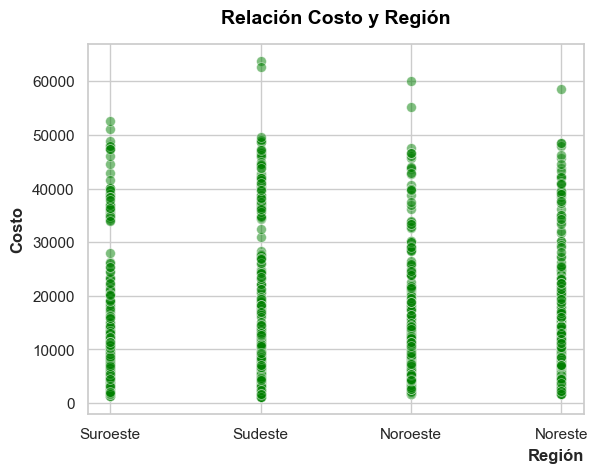

In [202]:
sns.scatterplot(data=costo_seguro,x='Región',y='Costo', color='green', alpha= 0.5,s=50)
plt.title("Relación Costo y Región",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("Región", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.xticks(['southwest', 'northwest', 'southeast', 'northeast'], ["Suroeste", "Noroeste", "Sudeste", "Noreste"])
plt.ylabel("Costo", fontweight= 'bold', labelpad= 5)
plt.show()

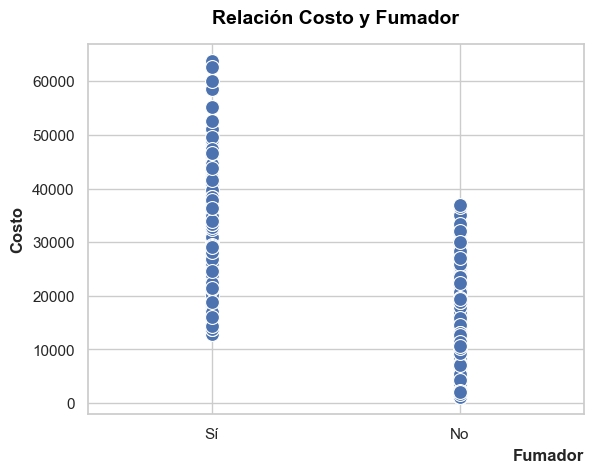

In [203]:
sns.scatterplot(data=costo_seguro,x='Fumador',y='Costo', s=100)
plt.xlim(-0.5, 1.5)
plt.title("Relación Costo y Fumador",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("Fumador", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.xticks(['yes', 'no'], ["Sí", "No"])
plt.ylabel("Costo", fontweight= 'bold', labelpad= 5)
plt.show()

## Hipótesis e inferencia estadística

- A mayor IMC, mayor costo de seguro de salud .

- A mayor edad, mayor costo de seguro de salud.

- A mayor cantidad de hijos, mayor costo de seguro de salud.

- Si la persona es fumadora, aumenta el costo de seguro de salud.

- No parece haber covarianza entre costo y región o entre costo y sexo.

### Covarianza y correlación

Obtenemos dummies para variables categóricas

In [204]:
costo_seguro = pd.get_dummies(costo_seguro, columns=['Sexo', 'Fumador', 'Región'], drop_first=True)

In [205]:
pd.set_option('display.max_columns', None)
costo_seguro

,Edad,IMC,Hijos,Costo,Sexo_male,Fumador_yes,Región_northwest,Región_southeast,Región_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


#### Matriz de correlación

In [206]:
mat_cor= costo_seguro.corr()

Definimos una función que nos permita ordenar la matriz de correlación para una mejor visualización

In [207]:
def bestCoefficients(dataframe, matriz ,k: int, nombre_columna: str):
    cols = matriz.nlargest(k, nombre_columna)[nombre_columna].index
    cm = np.corrcoef(dataframe[cols].values.T)
    sns.heatmap(cm, annot=True, cmap='coolwarm',annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    return cols

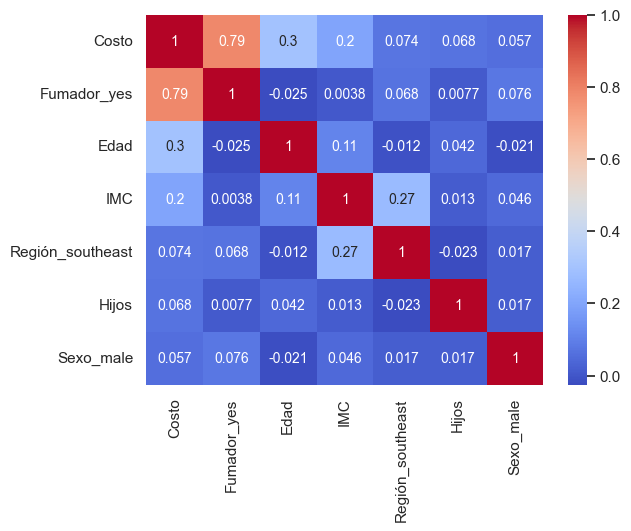

In [208]:
mapa_calor = bestCoefficients(costo_seguro, mat_cor, 7, 'Costo')

- Hay una **alta correlación positiva** entre que la persona sea *fumadora y el costo de seguro de salud*.

- Hay una **correlación positiva moderada** entre *Edad y Costo* y entre *IMC y Costo*.

- El resto de las variables tienen correlaciones bajas. En el caso de la variable Hijos, puede deberse a que hay clases desbalanceadas: el dataset registra muchos más casos de personas con 0 hijos respecto al resto de cantidades posibles. 

### Regresión lineal

Dado lo anterior, plantearemos un modelo linear múltiple con dummies incluyendo los siguientes features:

- Edad

- IMC

- Dummy fumador

In [209]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
X = costo_seguro[['Edad', 'IMC', 'Fumador_yes']]
y = costo_seguro['Costo']

X

,Edad,IMC,Fumador_yes
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [210]:
model.fit(X, y)

LinearRegression()

In [211]:
a= model.coef_
b= model.intercept_
y_pred = model.predict(X)

mae=mean_absolute_error(y, y_pred)
mse= mean_squared_error(y, y_pred)
r_cuadrado= r2_score(y, y_pred)

#### Presentación de resultados del modelo

In [215]:
lista1= ['Coeficiente Edad:', 'Coeficiente IMC:', 'Coeficiente d-Fumador:']
acumulador = 0
titulo= "REGRESIÓN LINEAL COSTO, EDAD, IMC Y dummy-FUMADOR"

print(f"{'-'*len(titulo)}")
print(titulo)
print(f"{'-'*len(titulo)}")
for coeficiente in a:
    print(f"{lista1[acumulador].ljust(22)} {round(coeficiente,2)}")
    acumulador += 1
print(f"{'Intercepto:'.ljust(10)} {round(b,3)}")
print(f"{'-'*len(titulo)}")
print(f"{'-'*len(titulo)}")
print(f"{'MAE:'.ljust(5)} {round(mae,2)}")
print(f"{'MSE:'.ljust(5)} {round(mse,2)}")
print(f"{'R cuadrado:'.ljust(10)} {round(r_cuadrado, 3)}")
print(f"{'-'*len(titulo)}")

-------------------------------------------------
REGRESIÓN LINEAL COSTO, EDAD, IMC Y dummy-FUMADOR
-------------------------------------------------
Coeficiente Edad:      259.55
Coeficiente IMC:       322.62
Coeficiente d-Fumador: 23823.68
Intercepto: -11676.83
-------------------------------------------------
-------------------------------------------------
MAE:  4216.78
MSE:  37005395.75
R cuadrado: 0.747
-------------------------------------------------


## Conclusiones

Según los coeficientes:
- Cuando la edad aumenta un año, el costo de seguro de vida de una persona lo hace en 259,55 dólares.

- Cuando el IMC aumenta en una unidad, el costo de seguro de vida de una persona lo hace en 322,62 dólares.

- Cuando la persona es fumadora, el costo de seguro de vida de una persona lo hace en 23823,68 dólares.

- El valor de la constante no es interpretable.

Si bien el modelo tiene un R^2 aceptable, que explica el 74% de la varianza de la variable independiente, el error cuadrático medio es muy alto. Esto se puede ver en los gráficos anteriormente expuestos de relación Edad-Costo e IMC-Costo, en los que se puede apreciar que difícilmente se cumple el postulado de linealidad, necesario para generar un modelo de regresión válido. 

El mejor predictor del costo de seguro de vida de una persona es si fuma o no.

## Anexo

Métodos y funciones que usé y que no vimos en el curso

In [213]:
costo_seguro.select_dtypes?


Signature: costo_seguro.select_dtypes(include=None, exclude=None) -> 'DataFrame'
Docstring:
Return a subset of the DataFrame's columns based on the column dtypes.

Parameters
----------
include, exclude : scalar or list-like
    A selection of dtypes or strings to be included/excluded. At least
    one of these parameters must be supplied.

Returns
-------
DataFrame
    The subset of the frame including the dtypes in ``include`` and
    excluding the dtypes in ``exclude``.

Raises
------
ValueError
    * If both of ``include`` and ``exclude`` are empty
    * If ``include`` and ``exclude`` have overlapping elements
    * If any kind of string dtype is passed in.

See Also
--------
DataFrame.dtypes: Return Series with the data type of each column.

Notes
-----
* To select all *numeric* types, use ``np.number`` or ``'number'``
* To select strings you must use the ``object`` dtype, but note that
  this will return *all* object dtype columns
* See the `numpy dtype hierarchy
  <https://numpy

In [214]:
plt.xlim?

Signature: plt.xlim(*args, **kwargs) -> 'tuple[float, float]'
Docstring:
Get or set the x limits of the current axes.

Call signatures::

    left, right = xlim()  # return the current xlim
    xlim((left, right))   # set the xlim to left, right
    xlim(left, right)     # set the xlim to left, right

If you do not specify args, you can pass *left* or *right* as kwargs,
i.e.::

    xlim(right=3)  # adjust the right leaving left unchanged
    xlim(left=1)  # adjust the left leaving right unchanged

Setting limits turns autoscaling off for the x-axis.

Returns
-------
left, right
    A tuple of the new x-axis limits.

Notes
-----
Calling this function with no arguments (e.g. ``xlim()``) is the pyplot
equivalent of calling `~.Axes.get_xlim` on the current axes.
Calling this function with arguments is the pyplot equivalent of calling
`~.Axes.set_xlim` on the current axes. All arguments are passed though.
File:      c:\users\equipo\appdata\local\packages\pythonsoftwarefoundation.python.3.11